## Uniformly Varied Movement - Euler Integration

Calculate position (y) of an object that was thrown up, according to time (t).

Two methods are used:

- Euler Method

$$y_{i+1} = y_i + h \frac{dy(t)}{dt}$$

- Analytical solution

$$v(t) = v_0 - gt = \frac{dy}{dt} = v_0 - gt \to y = \int_0^{t} v_0 - gt dt \to y(t) = y_0 + v_0 t - \frac{gt^2}{2}$$


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# criando a função
def integrate_uvm(v0: float, y0: float, tf: float, precision: int) -> None:
    """
    Realizar a integração da equação do MUV (movimento uniformemente variado)
    para um objeto lançado verticalmente

    Parameters:
        v0 : float
            velocidade inicial do objeto (m/s)
        y0 : float
            altura inicial de lançamento (m)
        tf : float
            tempo final para cálculo da simulação (s)
        precision : int
            precisão para cálculo da integral (inteiro positivo) - quanto maior,
            mais precisa a integral porém requer maior processamento    
    """

    # definindo constantes
    g = 9.81 # aceleração da gravidade (m/s²)

    # criando malha de tempos discretizados com precisão definida pelo usuário
    malha_tempos_discretizados = np.linspace(0, tf, precision)

    # calculando o passo de integração "h"
    h = malha_tempos_discretizados[1] - malha_tempos_discretizados[0]

    # criando listas para os valores de "y" tanto para Euler quanto para sol. analítica
    y = [y0]
    y_real = []

    # iterando por cada tempo na malha de discretização
    for t in malha_tempos_discretizados:
        
        # atualizando lista de valores de posição "y" com integração numérica de Euler
        y.append(y[-1] + h * (v0 - (g * t)))
        
        # atualizando lista de valores de posição "y" com a solução analítica
        y_real.append(y0 + (v0 * t) - ((g * (t ** 2))/2))

    # plotando gráfico de resultados com utilização da biblioteca matplotlib
    # comparação entre a resolução numérica de Euler e a solução Analítica
    plt.plot(malha_tempos_discretizados, y_real, label='Solucao Analitica')
    plt.plot(malha_tempos_discretizados, y[:-1], label='Solucao Numerica de Euler')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Altura [m]')
    plt.legend(loc='best')
    plt.show()

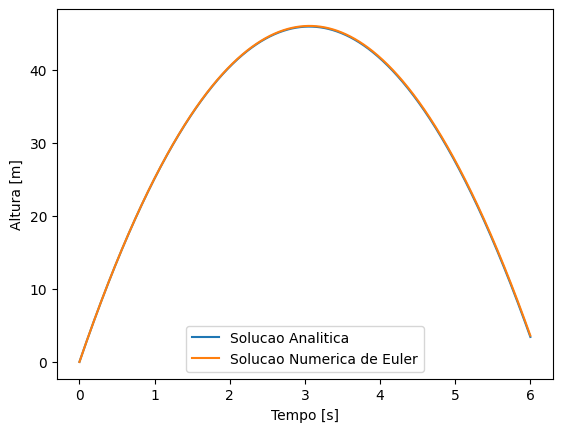

In [7]:
# requerendo dados do usuário
initial_velocity = float(input('Velocidade inicial [m/s]: '))
initial_position = float(input('Altura inicial: [m] '))
final_time = float(input('Tempo final: [s] '))
precision = int(input('Precisao: [1 a infinito - quanto mais preciso maior o tempo de processamento] '))

# chamando a função
integrate_uvm(v0=initial_velocity, y0=initial_position, tf=final_time, precision=precision)